*Customer Churn Prediction Using Random Forest: A Data-Driven Retention Strategy*

*Problem Statement*

Customer churn is a major challenge for subscription-based businesses such as telecom companies. When customers discontinue their services, it directly affects revenue and increases customer acquisition costs. Most organizations identify churn after it happens, which is too late to take corrective actions.

Problem:
The company lacks a predictive system to identify customers who are likely to churn in advance.

Solution:
Build a machine learning model using Random Forest to predict customer churn based on historical customer data and behavioral patterns, enabling the business to take proactive retention measures.

*Objectives*

The main objectives of this project are:

- To analyze customer demographic, usage, and billing data.

- To identify patterns and factors contributing to customer churn.

- To build a Random Forest classification model to predict whether a customer will churn.

- To evaluate the model using business-relevant metrics such as Recall, F1-score, and ROC-AUC.

- To extract feature importance to understand key churn drivers.

- To support data-driven decision-making for customer retention strategies.

*Dataset Description*

The dataset used for this project is the Telco Customer Churn Dataset, which contains customer-level data from a telecom service provider.

- Each row represents one customer

- Each column represents customer attributes or service details

- The dataset includes both categorical and numerical features

- The target variable is Churn

| Column Name        | Data Type            | Description                                               |
| ------------------ | -------------------- | --------------------------------------------------------- |
| `customerID`       | Categorical          | Unique identifier assigned to each customer               |
| `gender`           | Categorical          | Gender of the customer (Male / Female)                    |
| `SeniorCitizen`    | Binary (0/1)         | Indicates whether the customer is a senior citizen        |
| `Partner`          | Categorical          | Whether the customer has a partner (Yes / No)             |
| `Dependents`       | Categorical          | Whether the customer has dependents (Yes / No)            |
| `tenure`           | Numerical            | Number of months the customer has stayed with the company |
| `PhoneService`     | Categorical          | Indicates whether the customer has phone service          |
| `MultipleLines`    | Categorical          | Indicates whether the customer has multiple phone lines   |
| `InternetService`  | Categorical          | Type of internet service (DSL / Fiber optic / None)       |
| `OnlineSecurity`   | Categorical          | Whether the customer has online security service          |
| `OnlineBackup`     | Categorical          | Whether the customer has online backup service            |
| `DeviceProtection` | Categorical          | Whether the customer has device protection plan           |
| `TechSupport`      | Categorical          | Whether the customer has technical support service        |
| `StreamingTV`      | Categorical          | Indicates whether the customer uses streaming TV          |
| `StreamingMovies`  | Categorical          | Indicates whether the customer uses streaming movies      |
| `Contract`         | Categorical          | Contract type (Month-to-month / One year / Two year)      |
| `PaperlessBilling` | Categorical          | Whether the customer uses paperless billing               |
| `PaymentMethod`    | Categorical          | Payment method used by the customer                       |
| `MonthlyCharges`   | Numerical            | Monthly amount charged to the customer                    |
| `TotalCharges`     | Numerical            | Total amount charged to the customer over the tenure      |
| `Churn`            | Categorical (Target) | Indicates whether the customer churned (Yes / No)         |


*Target Variable Explanation*

Churn indicates whether a customer has discontinued the service.

- Yes → Customer has churned

- No → Customer is retained

This is a binary classification problem.

*Exploratory Data Analysis (EDA)*

EDA helps understand:

- Data quality

- Customer behavior

- Factors influencing churn before building the model.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline 
#to display imagine inside jupyter notebook

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,precision_score

Importing the Dataset

In [2]:
ds = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
ds.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
294,1563-IWQEX,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,220.35,No
2539,2050-ONYDQ,Female,0,Yes,Yes,65,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.00,1654.85,No
2077,3177-LASXD,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,71.35,71.35,Yes
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No
6199,2856-NNASM,Male,1,No,No,43,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.55,3856.75,Yes
5997,3462-BJQQA,Female,0,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.75,552.65,No
3361,8659-HDIYE,Female,1,No,No,64,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),74.65,4869.35,No
6113,1228-ZLNBX,Male,0,No,No,21,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,75.30,1570.7,No
2851,1897-OKVMW,Female,0,Yes,Yes,64,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.60,5817.45,No
6065,4458-KVRBJ,Male,0,No,No,59,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.00,1510.5,No


In [4]:
ds.shape

(7043, 21)

In [5]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
ds.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
ds['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
ds['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Insight:

- If churned customers are fewer, the dataset is imbalanced

- Accuracy alone is misleading → Recall & F1-score are more important

Numerical Feature Analysis

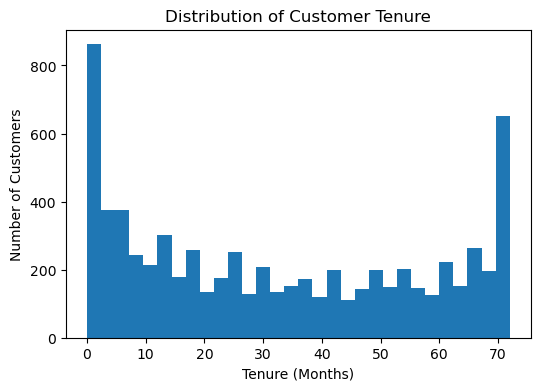

In [10]:
plt.figure(figsize=(6,4))
plt.hist(x=ds['tenure'], bins=30)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

Insight:

- Customers with lower tenure are more likely to churn

- Long-term customers show higher loyalty

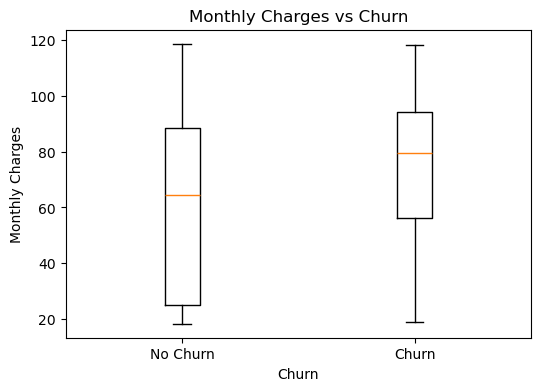

In [11]:
churn_yes = ds[ds['Churn'] == 'Yes']['MonthlyCharges']
churn_no  = ds[ds['Churn'] == 'No']['MonthlyCharges']

plt.figure(figsize=(6,4))
plt.boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'])
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

Insight:

- Higher monthly charges are associated with higher churn probability

Categorical Feature Analysis

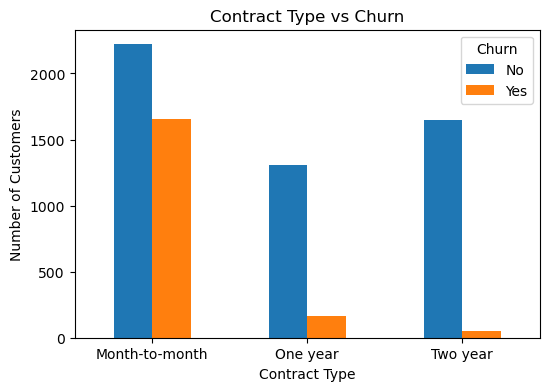

In [12]:
contract_churn = pd.crosstab(ds['Contract'], ds['Churn'])

# Plot grouped bar chart
contract_churn.plot(kind='bar', figsize=(6,4))

plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

Insight:

- Month-to-month contracts have the highest churn

- Long-term contracts reduce churn significantly

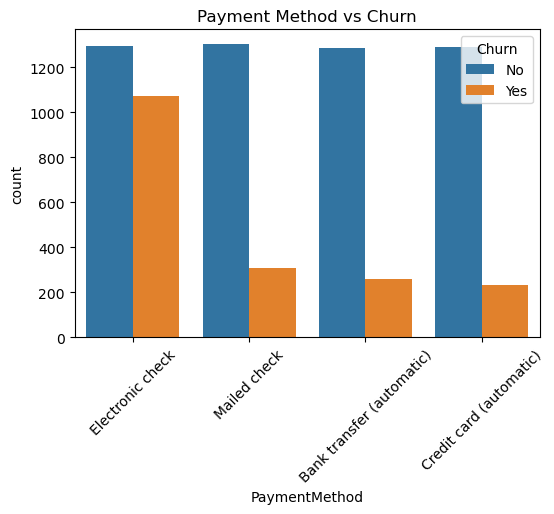

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=ds)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

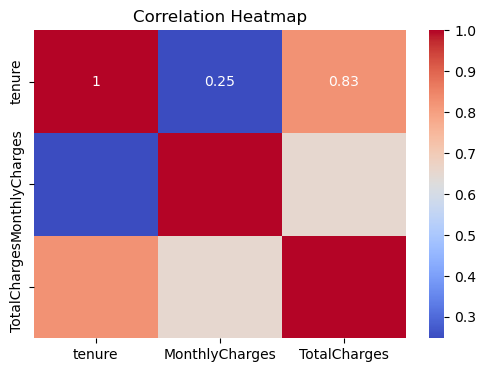

In [14]:
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'], errors='coerce')

plt.figure(figsize=(6,4))
sns.heatmap(ds[['tenure','MonthlyCharges','TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

*EDA Summary*

- Churn rate is imbalanced
- Customers with short tenure churn more
- High monthly charges increase churn risk
- Month-to-month contracts show highest churn
- Long-term contracts improve retention

*Data Preprocessing & Feature Engineering*

In [15]:
ds = ds.drop('customerID', axis=1)

In [16]:
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'], errors='coerce')

In [17]:
ds = ds.dropna()

In [18]:
ds.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Encoding Target Variable (Churn)

In [19]:
le = LabelEncoder()
ds['Churn']=le.fit_transform(ds['Churn'])
ds['Churn'].value_counts()


Churn
0    5163
1    1869
Name: count, dtype: int64

In [20]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'No': 0, 'Yes': 1}

In [21]:
x = ds.drop('Churn', axis=1)
y = ds['Churn']

In [22]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [23]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [24]:
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(exclude=['object']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Encode Categorical Features

In [25]:
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=25,shuffle=True,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5274, 30), (1758, 30), (5274,), (1758,))

In [27]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_baseline.predict(x_test)
y_prob = rf_baseline.predict_proba(x_test)[:, 1]

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8037542662116041


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1291
           1       0.67      0.51      0.58       467

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.79      0.80      0.79      1758



In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1174  117]
 [ 228  239]]


In [32]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8282559044082156


In [33]:
feature_importance = pd.Series(rf_baseline.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_importance.head(10)

TotalCharges                      0.193820
MonthlyCharges                    0.168883
tenure                            0.168196
InternetService_Fiber optic       0.040663
PaymentMethod_Electronic check    0.035436
Contract_Two year                 0.029909
gender_Male                       0.029271
OnlineSecurity_Yes                0.027665
PaperlessBilling_Yes              0.025998
Contract_One year                 0.025098
dtype: float64

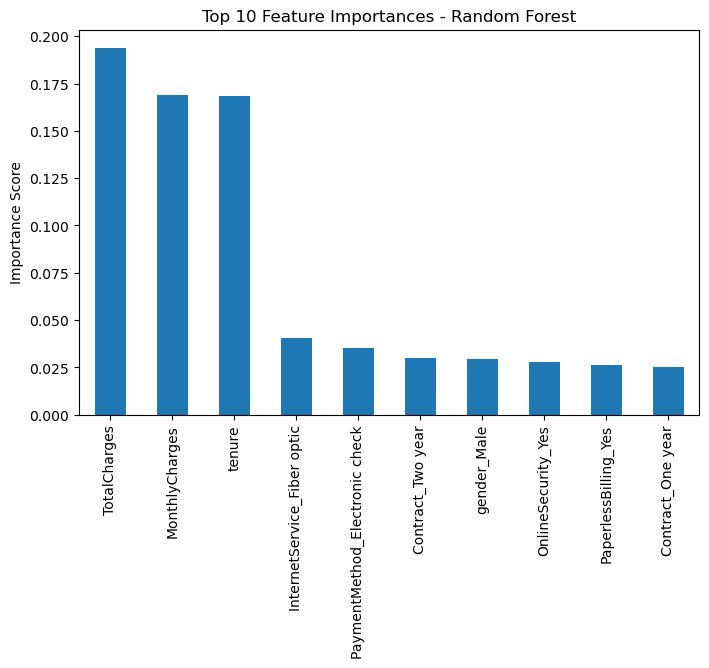

In [34]:
plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.show()

Hyper-Parameter Tuning using RandomizedSearchCV

In [35]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [36]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',   # focus on churn detection
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='recall', verbose=1)

In [37]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': 'balanced'}

In [38]:
best_rf = random_search.best_estimator_

In [39]:
y_pred_tuned = best_rf.predict(x_test)
y_prob_tuned = best_rf.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred_tuned))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1291
           1       0.56      0.77      0.65       467

    accuracy                           0.78      1758
   macro avg       0.73      0.77      0.74      1758
weighted avg       0.81      0.78      0.79      1758

ROC-AUC: 0.8479408588863437
Confusion Matrix:
 [[1003  288]
 [ 107  360]]


Threshold Optimization

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score
thresholds = np.arange(0.2, 0.6, 0.05)

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    
    print(f"Threshold: {t:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")

Threshold: 0.20 | Precision: 0.46 | Recall: 0.84 | F1: 0.59
Threshold: 0.25 | Precision: 0.49 | Recall: 0.79 | F1: 0.61
Threshold: 0.30 | Precision: 0.52 | Recall: 0.74 | F1: 0.61
Threshold: 0.35 | Precision: 0.55 | Recall: 0.68 | F1: 0.61
Threshold: 0.40 | Precision: 0.59 | Recall: 0.63 | F1: 0.61
Threshold: 0.45 | Precision: 0.62 | Recall: 0.58 | F1: 0.60
Threshold: 0.50 | Precision: 0.66 | Recall: 0.53 | F1: 0.59
Threshold: 0.55 | Precision: 0.70 | Recall: 0.47 | F1: 0.56


In [42]:
y_pred_opt = (y_prob >= 0.4).astype(int)

In [43]:
print(classification_report(y_test, y_pred_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1291
           1       0.59      0.63      0.61       467

    accuracy                           0.78      1758
   macro avg       0.73      0.74      0.73      1758
weighted avg       0.79      0.78      0.79      1758

Confusion Matrix:
 [[1084  207]
 [ 172  295]]


*Final Insights*

- Customers with shorter tenure exhibit a significantly higher likelihood of churn, highlighting the importance of strong onboarding and early engagement strategies.
- Month-to-month contract customers show the highest churn rates compared to long-term contract holders, indicating that contract duration plays a critical role in customer retention.
- Higher monthly charges are strongly associated with increased churn probability, suggesting that pricing and perceived value influence customer loyalty.
- Hyperparameter tuning and threshold optimization significantly improved the model’s ability to identify churned customers, achieving high recall and a ROC-AUC of approximately 0.85.
- Feature importance analysis revealed that tenure, contract type, billing amount, and support-related services are the most influential factors driving churn.
- The optimized Random Forest model provides actionable business insights, enabling targeted retention campaigns and data-driven decision-making to reduce customer attrition.

In [44]:
import pickle

with open("best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)
